In [1]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
label_dict = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica':3}
df[4].replace(to_replace=label_dict, inplace=True)
df

C:\Users\je_su\AppData\Local\Temp\ipykernel_31172\200133861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[4].replace(to_replace=label_dict, inplace=True)
C:\Users\je_su\AppData\Local\Temp\ipykernel_31172\200133861.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[4].replace(to_replace=

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [3]:
X = df[[0,1,2,3]].values
y = df[4].values

In [4]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

feature_dict

{0: 'sepal length in cm',
 1: 'sepal width in cm',
 2: 'petal length in cm',
 3: 'petal width in cm'}

In [5]:
label_dict2 = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

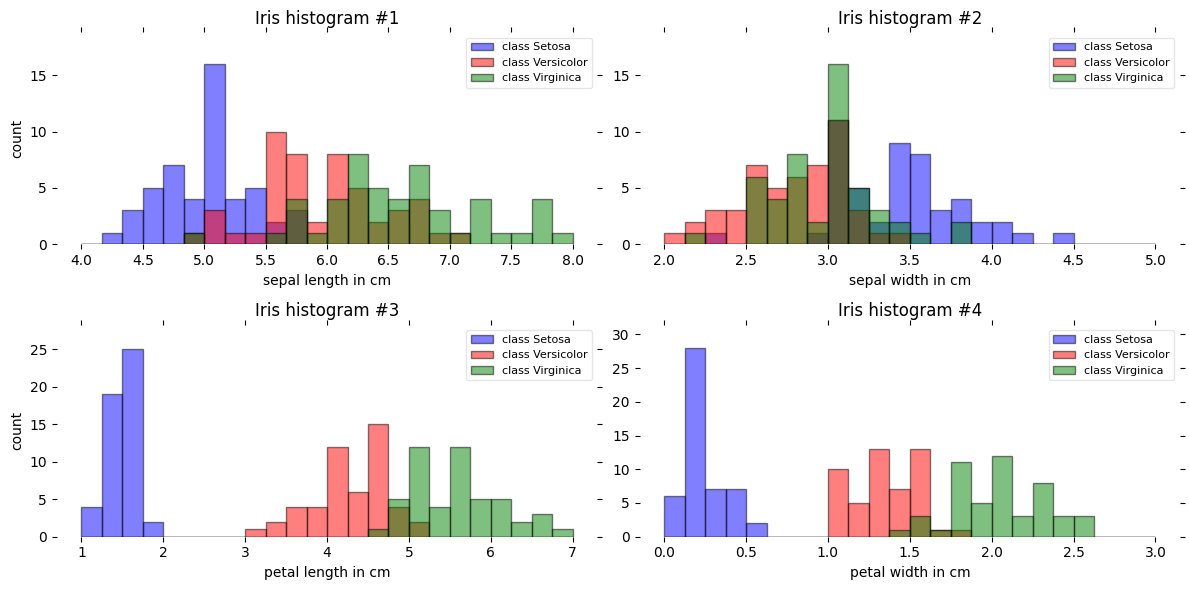

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict2[lab],
                   bins=bins,
                   alpha=0.5,
                    edgecolor='k')
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()

plt.show()

Me quedo sólo con 2 clases (Setosa y Versicolor) y con las características que me permiten separar las clases más fácilmente (largo y ancho de pétalo)

In [17]:
X_new = X[:100, 2:4].copy()
X_new.shape

(100, 2)

In [18]:
y_new= y[:100].copy()
y_new.shape

(100,)

In [19]:
y_new

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_new, y_new)

LinearDiscriminantAnalysis()

In [21]:
lda.coef_

array([[17.33126426, 15.77660823]])

In [22]:
X_lda = lda.transform(X_new)
X_lda.shape

(100, 1)

Text(0.5, 0, 'petal width in cm')

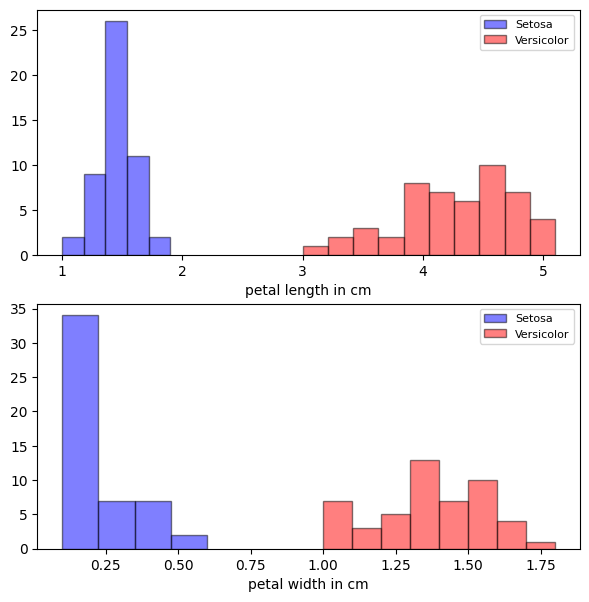

In [23]:
col = ('blue', 'red', 'green')

plt.figure(figsize=(7,7))
plt.subplot(211)

plt.hist(X_new[y_new==1, 0],color=col[0],label=f'{label_dict2[1]}',
                bins=5,alpha=0.5, edgecolor='k')
plt.hist(X_new[y_new==2, 0],color=col[1],label=f'{label_dict2[2]}',
                bins=10,alpha=0.5, edgecolor='k')
plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.xlabel(feature_dict[2])

plt.subplot(212)
plt.hist(X_new[y_new==1, 1],color=col[0],label=f'{label_dict2[1]}',
                bins=4,alpha=0.5, edgecolor='k')
plt.hist(X_new[y_new==2, 1],color=col[1],label=f'{label_dict2[2]}',
                bins=8,alpha=0.5, edgecolor='k')
plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.xlabel(feature_dict[2])

plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.xlabel(feature_dict[3])

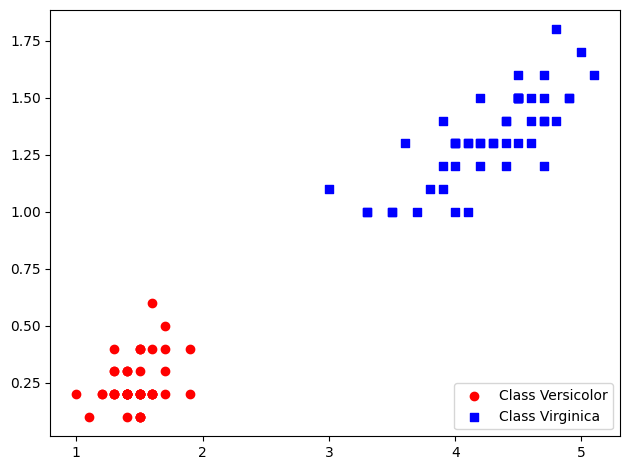

In [24]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_new), colors, markers):
    plt.scatter(X_new[y_new == l, 0],
                X_new[y_new == l, 1],
                c=c, label=f'Class {label_dict2[l+1]}', marker=m)


plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

scale_features = True

if scale_features:
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_new)
else:
    X_train_std = X_new.copy()

In [26]:
np.set_printoptions(precision = 4)

mean_vecs = []

for label in range(1,3):
    mean_vecs.append( np.mean(X_train_std[y_new==label], axis=0) )
    print(f'vector de medias {label}: {mean_vecs[label-1]}')

mean_vecs[0].shape

vector de medias 1: [-0.97   -0.9602]
vector de medias 2: [0.97   0.9602]


(2,)

In [28]:
d = 2
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 3), mean_vecs):
    class_scatter = np.zeros((d, d))  # matriz de dispersión de cada clase
    for row in X_train_std[y_new == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # vectores columna
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # suma de las matrices de dispersión

print('Matriz de dispersión intra-clase: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Matriz de dispersión intra-clase: 2x2


In [29]:
S_W

array([[5.9187, 4.7546],
       [4.7546, 7.8097]])

In [30]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # lo hago vector columna

d = 2  # number of features
S_B = np.zeros((d, d))

#-------------------------------------------------------------------------
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_new == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
#--------------------------------------------------------------------------

print('Matriz de dispersión entre clases: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

Matriz de dispersión entre clases: 2x2


In [31]:
S_B

array([[94.0813, 93.131 ],
       [93.131 , 92.1903]])

In [32]:
np.linalg.inv(S_W).dot(S_B)

array([[12.3618, 12.2369],
       [ 4.3991,  4.3547]])

In [33]:

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [34]:
# lista de tuplas (autovalor, autovector)
eigen_pairs = [ (np.abs(eigen_vals[i]), eigen_vecs[:, i].real) for i in range(len(eigen_vals))]

# ordenamos las tuplas de mayor a menor
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Autovalores en orden descendente:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Autovalores en orden descendente:

16.71645534949255
1.1546319456101628e-14


In [35]:
eigen_pairs

[(16.71645534949255, array([0.9421, 0.3353])),
 (1.1546319456101628e-14, array([-0.7035,  0.7107]))]

In [36]:
w = eigen_pairs[0][1].reshape(2,1)
print('Matriz W:\n', w)

Matriz W:
 [[0.9421]
 [0.3353]]


In [37]:
X_lda = X_train_std.dot(w)

In [38]:
X_lda.shape

(100, 1)

[[0.1208 0.097 ]
 [0.097  0.1594]]
[[-12.4898]
 [ -4.4447]]


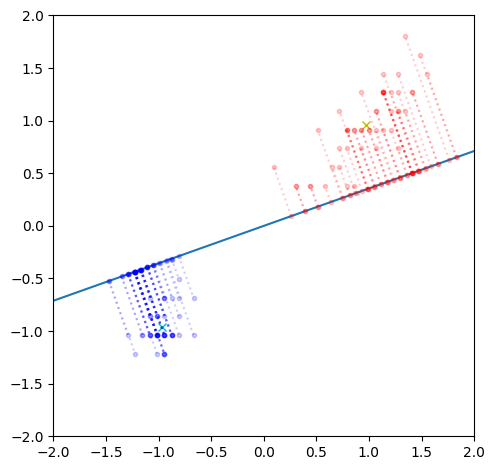

In [42]:
a = X_train_std[y_new == 1]
b = X_train_std[y_new == 2]
mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
Sw = np.cov(a.T) + np.cov(b.T) # La matriz de covarianza es una versión normalizada de la matriz de dispersión.
print(Sw)
inv_S = np.linalg.inv(Sw)
res = inv_S.dot(mu_a-mu_b)  # the trick
print(res)

plt.plot([-res[0], res[0]], [-res[1], res[1]]) # this is the solution
plt.plot(mu_a[0], mu_a[1], 'cx')
plt.plot(mu_b[0], mu_b[1], 'yx')
plt.gca().axis('square')


r = res.reshape(2,)
n2 = np.linalg.norm(r)**2
for pt in a:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.2)
for pt in b:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.2)

plt.ylim(-2,2)
plt.xlim(-2,2)
plt.tight_layout()
plt.show()

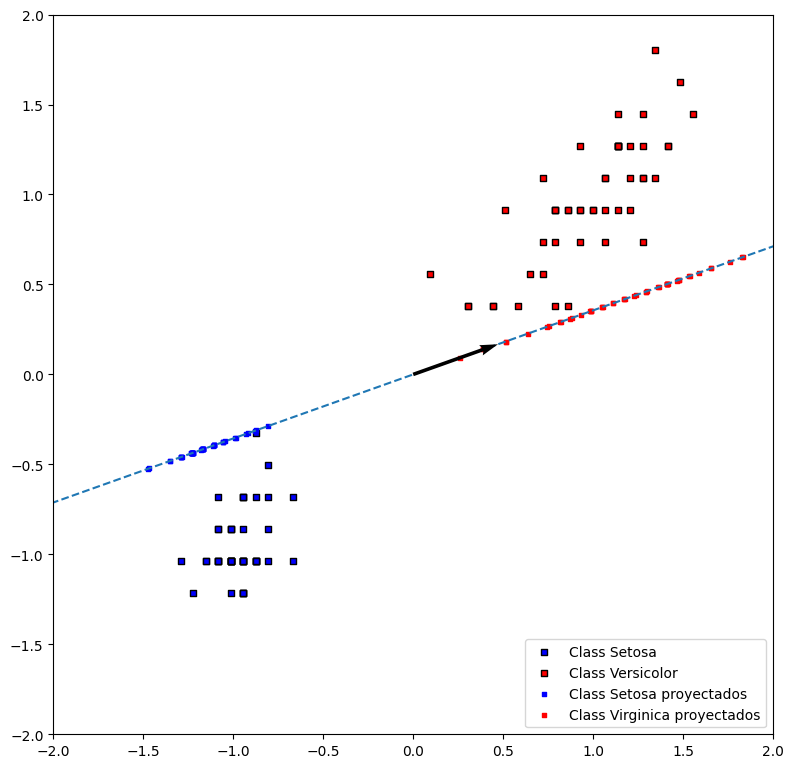

In [64]:
a = X_train_std[y_new == 1]
b = X_train_std[y_new == 2]

colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

punto = np.array([0,0])
vector = w

inter = -np.sum(vector*punto)
x = np.linspace(-2, 2, num=100)

y = -(vector[0]*x + inter)/vector[1]
dx, dy = vector

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

plt.plot([-8*w[0], 8*w[0]], [-8*w[1], 8*w[1]], linestyle='--')

#Datos en R^2 originalesfor l, c, m in zip(np.unique(y_new), colors, markers):
plt.scatter(X_train_std[y_new == 1, 0], X_train_std[y_new == 1, 1], c='b', label=f'Class {label_dict2[1]}', marker=m, s=14, edgecolors='k')
plt.scatter(X_train_std[y_new == 2, 0], X_train_std[y_new == 2, 1], c='r', label=f'Class {label_dict2[2]}', marker=m, s=14, edgecolors='k')
    
#datos proyectados sobre la dirección en el espacio original R^2
X_new = X_lda.dot(w.T) 
plt.scatter(X_new[y_new == 1, 0],
                X_new[y_new == 1, 1],
                c='b', label=f'Class Setosa proyectados', marker=m, s=12)

plt.scatter(X_new[y_new == 2, 0],
            X_new[y_new == 2, 1],
            c='r', label=f'Class Virginica proyectados', marker=m, s=12)

# for pt in a:
#     prj = r * r.dot(pt) / n2
#     plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.2)
# for pt in b:
#     prj = r * r.dot(pt) / n2
#     plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.2)   
     
ax.quiver(0,0, dx, dy, units='width', scale=8, width=0.005, zorder=100)

plt.gca().axis('square')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

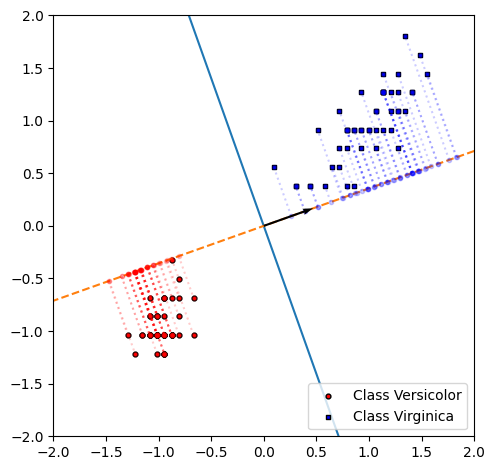

In [45]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

punto = np.array([0,0])
#punto = X_train_std.mean(axis=0)
vector = w

# a*x + b*y + c = 0
# y = -(a*x + c)/b
# c = -(a*x + b*y)
inter = -np.sum(vector*punto)
x = np.linspace(-2, 2, num=100)

y = -(vector[0]*x + inter)/vector[1]
dx, dy = vector
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x,y)

plt.plot([-8*w[0], 8*w[0]], [-8*w[1], 8*w[1]], linestyle='--')
for l, c, m in zip(np.unique(y_new), colors, markers):
    plt.scatter(X_train_std[y_new == l, 0],
                X_train_std[y_new == l, 1],
                c=c, label=f'Class {label_dict2[l+1]}', marker=m, s=12, edgecolors='k')


r = w.reshape(2,)
n2 = np.linalg.norm(r)**2
a = X_train_std[y_new == 1]
b = X_train_std[y_new == 2]
for pt in a:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.2)
for pt in b:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.2)

ax.quiver(0,0, dx, dy, units='width', scale=8, width=0.005, zorder=100)

plt.gca().axis('square')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()